In [1]:
"""
DLF Assignment 1
Rui Pu 1679834
"""

'\nDLF Assignment 1\nRui Pu 1679834\n'

# Libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn

# Plot
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('figure', dpi = 120)
plt.close('all')

# Step 1: Learn from the original dataset (from Kaggle)

## 1.1 Some notes about Pima Indians Diabetes Database

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

### 1.1.1 Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### 1.1.2 Content

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## 1.2 Load and preview the dataset

In [3]:
# Load the original dataset
original_df = pd.read_csv("diabetes.csv")

In [4]:
# Preview the dataset
original_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Save feature and label names
features = original_df.columns.values[:-1] # 8 features
label = original_df.columns.values[-1] # "Outcome" as the label
print(features)
print(label)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']
Outcome


In [6]:
print(f'Shape of features: {original_df[features].shape}') # 768 observations and 8 features
print(f'Shape of label: {original_df[label].shape}') # 768 observations, which is consistent with X

Shape of features: (768, 8)
Shape of label: (768,)


In [7]:
# Make sure there are only 2 labels in the outcome
print(f'Labels in the "Outcome": {np.unique(original_df[label])}')

Labels in the "Outcome": [0 1]


## 1.3 Visualize the dataset

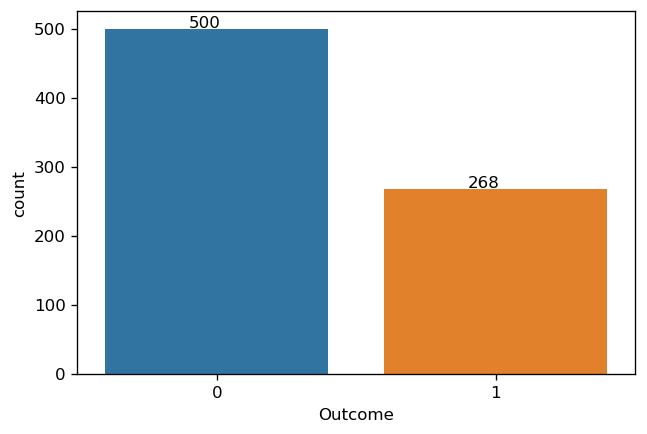

In [8]:
# Visualize the proportions of the labels

ax = sns.countplot(x = original_df[label])
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+2))

[500, 268]


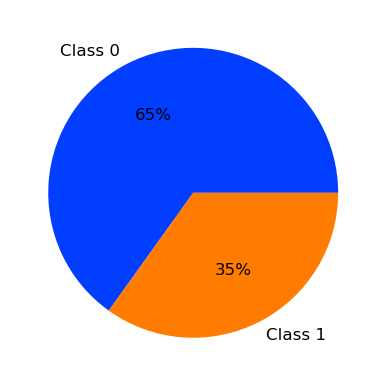

In [9]:
# Visualize the proportions of the labels

count = [len(original_df[original_df[label]==0]), len(original_df[original_df[label]==1])]
print(count)
classes = ["Class 0", "Class 1"]
palette_color = sns.color_palette('bright')
plt.pie(count, labels=classes, colors=palette_color, autopct='%.0f%%')
plt.show()

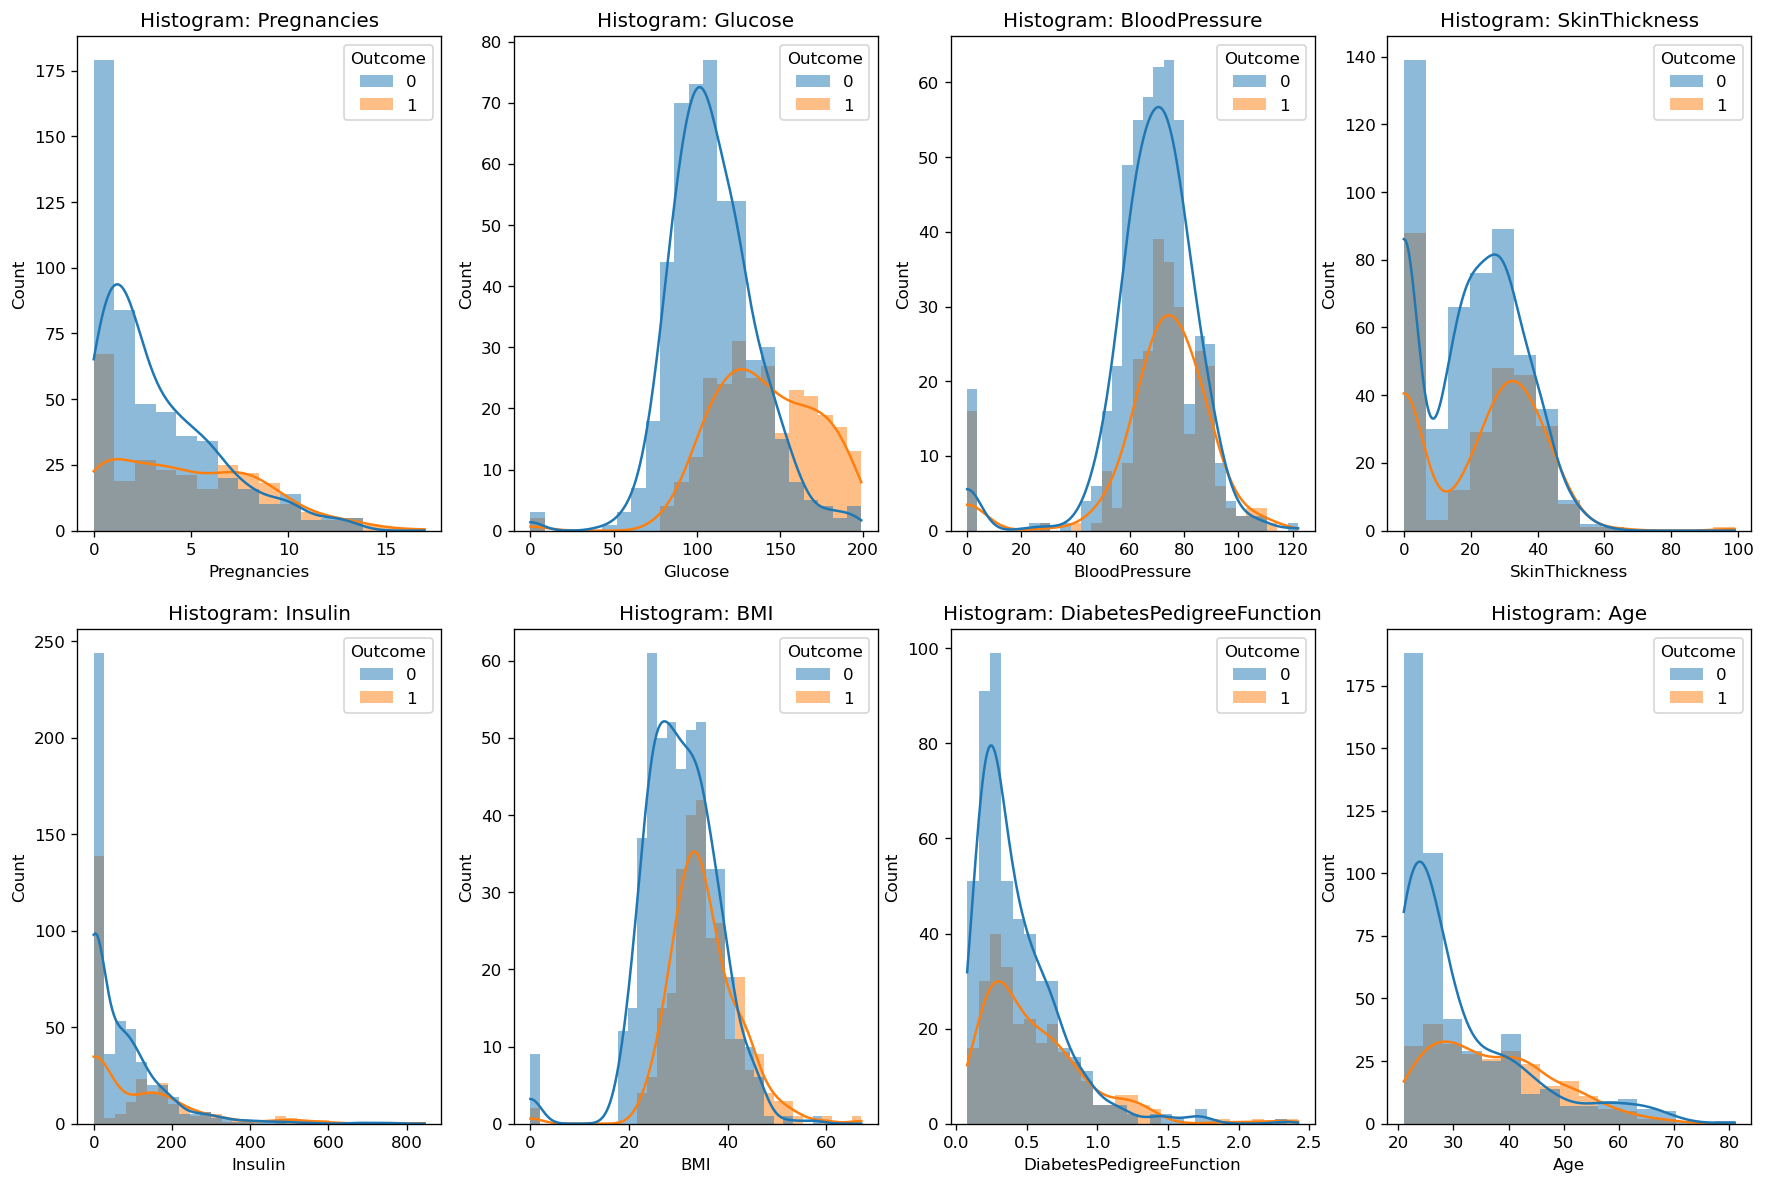

In [10]:
# Show density plots

# Create a subplot of 2 x 4
fig, axes = plt.subplots(2, 4, figsize=(18,12))

# Plot a density plot for each feature
n=0
while n<8:
    for row in range(2):
        for col in range(4):
            sns.histplot(data=original_df, x=original_df.columns[n], hue=original_df["Outcome"], kde=True,
                         ax=axes[row,col], edgecolor=None).set_title(f'Histogram: {original_df.columns[n]}')
            n += 1

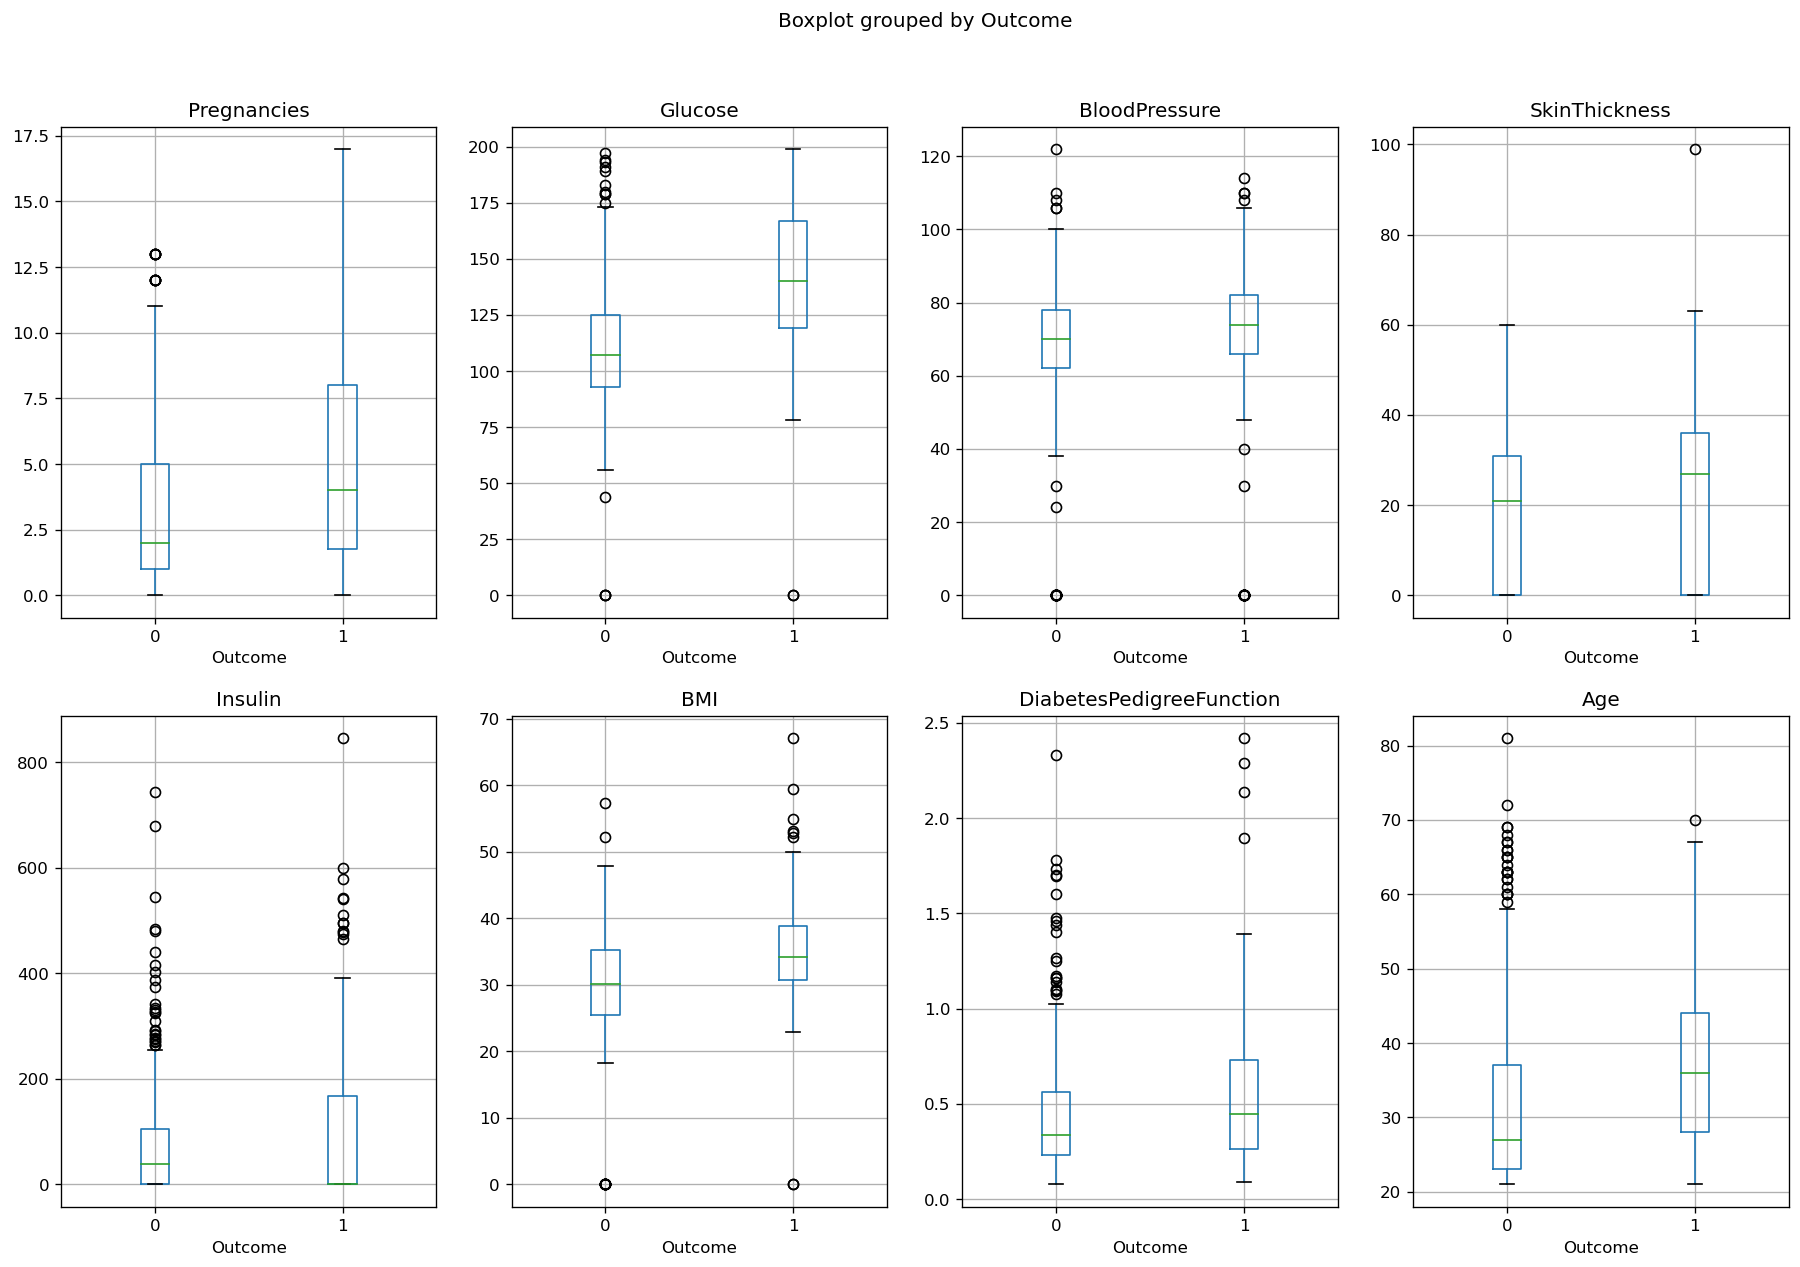

In [11]:
# Show boxplots

# Create a subplot of 2 x 4
fig, axes = plt.subplots(2,4, figsize=(18,12))

# Plot a boxplot for each feature
n=0
while n<8:
    for row in range(2):
        for col in range(4):
            original_df.boxplot(column=features[n], by="Outcome", ax=axes[row,col])
            n += 1

## 1.4 Comments on Step 1

There are 768 observations recorded in this orignial dataset from Kaggle. The label values from the outcome column are 0 and 1, indicating whether or not a patient is diabetic. There are also 8 features that help to predict, they are 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction' and 'Age'. 

According to above two visualization sections, we can notice most features are not perfectly discriminant, which means they will not be linearly separable. However, there is a remarkable difference in the distribution against each label for some of the features. For example, 'Pregnancies', 'Glucose' and 'Age' show a noticeable difference between diabetic patients and non-diabetic patients. The preliminary visualization of the differentiation in these features may help in classification and prediction for such a medical problem.

# Step 2: Load and preview the preprocessed dataset (from LIBSVM Data)

## 2.1 Read the preprocessed dataset

In [12]:
# Load the preprocessed dataset
from sklearn.datasets import load_svmlight_file
X, y = load_svmlight_file("diabetes_scale.txt")

# Print out the type of features and label
print(type(X))
print(type(y))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>


In [13]:
# Convert features to arrays
X = X.toarray()

print(f'Shape of features: {X.shape}') # 768 observations and 8 features
print(f'Shape of label: {y.shape}') # 768 observations, which is consistent with the number of X

Shape of features: (768, 8)
Shape of label: (768,)


In [14]:
# Make sure there are only 2 labels in the outcome
print(f'Label values: {np.unique(y)}')

Label values: [-1.  1.]


## 2.2 Split the dataset

In [15]:
# Split into training and test dataset by 8:2 (seed is used to allow repeatability)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y) 

print(f'Training cases: {X_train.shape[0]}')
print(f'Test cases: {X_test.shape[0]}')

Training cases: 614
Test cases: 154


# Step 3: Construct a Perceptron from scratch

In [16]:
class MyPerceptron:
    
    """
    Define A Perceptron Classifier.
    
    Parameters
    ----------
    lr : float
        Learning rate (between 0.0 and 1.0).
    n_iterations : int
        Iterations over the training set.
    
    Attributes
    ----------
    weights : 1D array
        Weights over the fitting
        Initialize to be all zeros, update over iterations
    bias : float
        Bias over the fitting
        Initialize to be zero, update over iterations
    """
    
    def __init__(self, learning_rate = 0.001, lr_mode = "fixed", n_iterations = 200):
        self.lr = learning_rate
        self.lr_mode = lr_mode # switch lr to be fixed or annealing (gradually reduced)
        self.n_iterations = n_iterations
        np.random.seed(100) # set a seed to ensure repeatability
        self.weights = np.random.rand(X.shape[1])
        self.bias = 0
        self.history = [] # To save training accuracy over n_iterations
        
        print(f'Learning Rate: {self.lr}')
    def fit(self, X, y):
        """
        Training the data.
        The process goes through:
            - net_sum_function : linear_y = np.dot(weights, x) + bias
            - activation_function : activation_y = return 1 if linear_y >= 0 else -1
            - update weights and bias if inconsistent y_true and y_pred 
            - save training accuracy history over n_iterations
        Until user-define number of iterations is reached.
        """
        for iteration in range(self.n_iterations):
    
            for i in range(X.shape[0]):
            
                # Go through net_input_function and activation_function
                linear_y = self.net_sum_function(X[i])
                activation_y = self.activation_function(linear_y)
                
                # Update weights and bias
                if y[i] * activation_y < 0:
                    self.weights += self.lr * y[i] * X[i]
                    self.bias += self.lr * y[i]
                    
            # If annealing learning rate, multiply lr by 0.9 every 10 iterations         
            if self.lr_mode == "annealing" and iteration % 10 == 0:
                self.lr *= 0.9
            else: 
                self.lr = self.lr

                
            # Calculate accuracy over n_iterations
            y_pred_np = self.predict(X)
            self.history.append(self.compute_accuracy(y, y_pred_np))
            
        print(f'Training Accuracy: {self.history[-1]*100:.2f}%')
#         print(f'Mean Traing Accuracy: {np.mean(self.history)*100:.2f}%')
        
    def predict(self, X):
        """
        Predict for an unseen test dataset : return 1D array containing only 1 or -1
        """
        y_pred = []
        for i in range(X.shape[0]):
            
            linear_y = self.net_sum_function(X[i])
            activation_y = self.activation_function(linear_y)
            y_pred.append(activation_y)
            
        return np.array(y_pred)
    
    
    def net_sum_function(self, x):
        """
        Calculate the net sum : return a net sum value: np.dot(self.weights, x) + self.bias
        """
        return np.dot(self.weights, x) + self.bias
        
    def activation_function(self, linear_y):
        """
        Determine the label value : return 1 if input >= 0 else -1
        """
        if linear_y >= 0:
            return 1
        else:
            return -1
    
    def compute_accuracy(self, y, y_pred):
        """
        Compute the accuracy
        """
        return np.sum(y == y_pred) / len(y)
    
    def plot_history(self):
        """
        Plot the training accuracy history against iterations
        """
        fig, ax = plt.subplots()
        ax.set_ylim((0, 1))
        
        ax.plot(range(self.n_iterations), self.history, label = 'Accuracy')
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Accuracy')
        plt.show()

# Step 4: Fit and predict using the constructed Perceptron

## 4.1 Exploration of learning rate

In [17]:
# Fit the model using the training dataset with a series of fixed learning rates

lrs = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
for lr in lrs:
    
    clf1 = MyPerceptron(learning_rate = lr)
    clf1.fit(X_train, y_train)
    
    # Predict using an unseen test dataset
    y_test_pred = clf1.predict(X_test)

    # Compute the accuracy
    test_accuracy = clf1.compute_accuracy(y_test, y_test_pred)
    print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

    print()

    # Plot the training acc history against iterations
#     clf.plot_history()

Learning Rate: 1e-06
Training Accuracy: 34.04%
Testing Accuracy: 33.77%

Learning Rate: 1e-05
Training Accuracy: 40.88%
Testing Accuracy: 40.91%

Learning Rate: 0.0001
Training Accuracy: 74.43%
Testing Accuracy: 75.97%

Learning Rate: 0.001
Training Accuracy: 72.31%
Testing Accuracy: 66.88%

Learning Rate: 0.01
Training Accuracy: 74.27%
Testing Accuracy: 68.18%

Learning Rate: 0.1
Training Accuracy: 73.45%
Testing Accuracy: 70.13%

Learning Rate: 1
Training Accuracy: 74.76%
Testing Accuracy: 75.97%



In [18]:
# Fit the model using the training dataset with a series of annealing learning rates
# The learning rate will be multiplied by 0.9 every 10 iterations

for lr in lrs:
    
    clf2 = MyPerceptron(learning_rate = lr, lr_mode = "annealing")
    clf2.fit(X_train, y_train)
    
    # Predict using an unseen test dataset
    y_test_pred = clf2.predict(X_test)

    # Compute the accuracy
    test_accuracy = clf2.compute_accuracy(y_test, y_test_pred)
    print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

    print()

    # Plot the training acc history against iterations
#     clf.plot_history()

Learning Rate: 1e-06
Training Accuracy: 34.20%
Testing Accuracy: 33.77%

Learning Rate: 1e-05
Training Accuracy: 31.11%
Testing Accuracy: 32.47%

Learning Rate: 0.0001
Training Accuracy: 58.79%
Testing Accuracy: 61.04%

Learning Rate: 0.001
Training Accuracy: 76.06%
Testing Accuracy: 76.62%

Learning Rate: 0.01
Training Accuracy: 73.94%
Testing Accuracy: 71.43%

Learning Rate: 0.1
Training Accuracy: 75.90%
Testing Accuracy: 73.38%

Learning Rate: 1
Training Accuracy: 73.13%
Testing Accuracy: 70.78%



## 4.2 Metrics and evaluations of the best model

Learning Rate: 0.001
Training Accuracy: 76.06%
Testing Accuracy: 76.62%



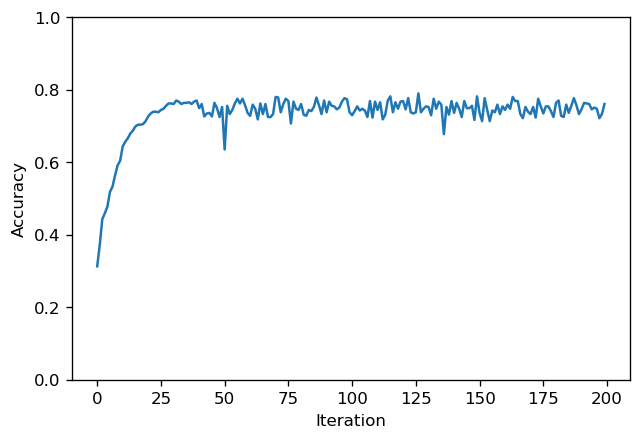

In [19]:
best_model = MyPerceptron(learning_rate = 0.001, lr_mode = "annealing")
best_model.fit(X_train, y_train)

# Predict using an unseen test dataset
y_test_pred = best_model.predict(X_test)

# Compute the accuracy
test_accuracy = best_model.compute_accuracy(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

print()

# Plot the training acc history against iterations
best_model.plot_history()

Accuracy Score: 0.7662
f1 Score: 0.8182


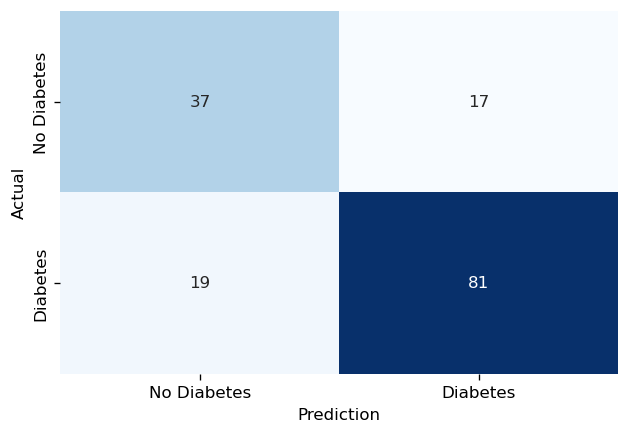

In [20]:
# sklearn built-in metric function

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Accuracy_score
acc_score = accuracy_score(y_test, y_test_pred)
print(f'Accuracy Score: {acc_score:.4f}')

# f1 score
f1 = f1_score(y_test, y_test_pred)
print(f'f1 Score: {f1:.4f}')

# Confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

ax = sns.heatmap(
    cm, annot = True, cbar = False, cmap = 'Blues',
    xticklabels = ['No Diabetes', 'Diabetes'], 
    yticklabels = ['No Diabetes', 'Diabetes']);
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

# Step 5: Compare with sklearn function Perceptron

In [21]:
from sklearn.linear_model import Perceptron

# Fit and predict using the default setting of Perceptron
check = Perceptron()
check.fit(X_train, y_train)
y_pred_check = check.predict(X_test)

Accuracy Score: 0.7857
f1 Score: 0.8421


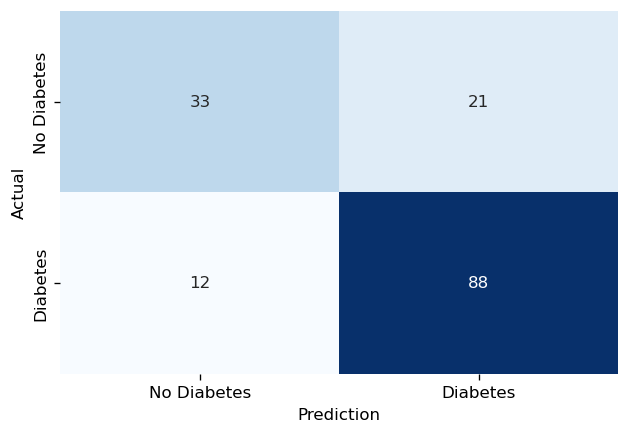

In [22]:
# Accuracy_score
acc_score_check = accuracy_score(y_test, y_pred_check)
print(f'Accuracy Score: {acc_score_check:.4f}')

# f1 score
f1_check = f1_score(y_test, y_pred_check)
print(f'f1 Score: {f1_check:.4f}')

# Confuction_matrix
cm_check = confusion_matrix(y_test, y_pred_check)

ax = sns.heatmap(
    cm_check, annot = True, cbar = False, cmap = 'Blues',
    xticklabels = ['No Diabetes', 'Diabetes'], 
    yticklabels = ['No Diabetes', 'Diabetes']);
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()